Make sure that the parent directory is on our python path

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

## Data Manipulation

Import methods

In [2]:
from Data.data_processing import load_data, to_daily_uni_multi, missing_values, data_normalization

Manipulate data

In [3]:
path = '../Data/Traffic_Incidents_Braga.csv'
method = 'multivariate'

cv_splits = 3  # time series cross validator

df_raw = load_data(path)                      # load dataset
df_multi = to_daily_uni_multi(method, df_raw) # convert data to univariate and group incidents by day
df_multi = missing_values(df_multi)           # deal with missing values

scaler = data_normalization(method, df_multi) # scaling data to [-1, 1]

## Parameter Optimization

Import methods

In [4]:
from models import generate_configs, grid_search

Define parameter ranges to generate different configurations to evaluate the models

In [5]:
features = 4 # multivariate

timesteps = [5, 7]
epochs = [10, 20]
batch_size = [5, 7]
filters = [16]
kernel_size = [5]
pool_size = [2]

Generate a list with all the possible configurations

In [6]:
configs = generate_configs(timesteps, epochs, batch_size, filters, kernel_size, pool_size)

Generated 8 different configurations


Grid search for the best configuration (sorted by performance)

Epoch 1/10
39/39 [==============================] - 0s 5ms/step - loss: 0.3124 - mae: 0.2776 - rmse: 0.3123 - val_loss: 0.3026 - val_mae: 0.2600 - val_rmse: 0.3134
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2248 - mae: 0.1913 - rmse: 0.2248 - val_loss: 0.2779 - val_mae: 0.2377 - val_rmse: 0.2852
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1709 - mae: 0.1421 - rmse: 0.1711 - val_loss: 0.2781 - val_mae: 0.2436 - val_rmse: 0.2839
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1544 - mae: 0.1287 - rmse: 0.1546 - val_loss: 0.2835 - val_mae: 0.2542 - val_rmse: 0.2874
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1482 - mae: 0.1246 - rmse: 0.1483 - val_loss: 0.2755 - val_mae: 0.2478 - val_rmse: 0.2783
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1438 - mae: 0.1207 - rmse: 0.1440 - val_loss: 0.2763 - val_mae: 0.2499 - val_rmse: 0.2784
Epoch 7/10
39/39

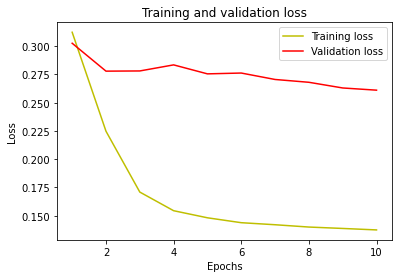

Configuration: timesteps=5, epochs=10, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.4349369406700134
mae: 0.35515379905700684
rmse: 0.5224694609642029
Epoch 1/10
28/28 [==============================] - 0s 6ms/step - loss: 0.7331 - mae: 0.7057 - rmse: 0.7306 - val_loss: 0.3607 - val_mae: 0.2745 - val_rmse: 0.3607
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.2575 - mae: 0.2215 - rmse: 0.2571 - val_loss: 0.3727 - val_mae: 0.3242 - val_rmse: 0.3727
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1847 - mae: 0.1527 - rmse: 0.1849 - val_loss: 0.3000 - val_mae: 0.2624 - val_rmse: 0.3000
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1775 - mae: 0.1462 - rmse: 0.1776 - val_loss: 0.3051 - val_mae: 0.2720 - val_rmse: 0.3051
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 0.1585 - mae: 0.1325 - rmse: 0.1586 - val_loss: 0.3145 - val_mae: 0.2836 - val_rmse: 0.3145
Epoch 6/10
28

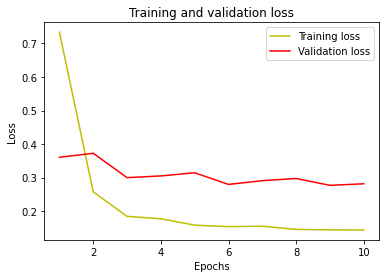

Configuration: timesteps=5, epochs=10, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.43405821919441223
mae: 0.35995784401893616
rmse: 0.5048092007637024
Epoch 1/20
39/39 [==============================] - 0s 5ms/step - loss: 0.3794 - mae: 0.3538 - rmse: 0.3784 - val_loss: 0.2703 - val_mae: 0.2518 - val_rmse: 0.2957
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1778 - mae: 0.1472 - rmse: 0.1778 - val_loss: 0.2459 - val_mae: 0.2215 - val_rmse: 0.2630
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1653 - mae: 0.1364 - rmse: 0.1653 - val_loss: 0.2655 - val_mae: 0.2506 - val_rmse: 0.2857
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1467 - mae: 0.1227 - rmse: 0.1468 - val_loss: 0.2688 - val_mae: 0.2535 - val_rmse: 0.2876
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1443 - mae: 0.1209 - rmse: 0.1444 - val_loss: 0.2620 - val_mae: 0.2462 - val_rmse: 0.2789
Epoch 6/20
3

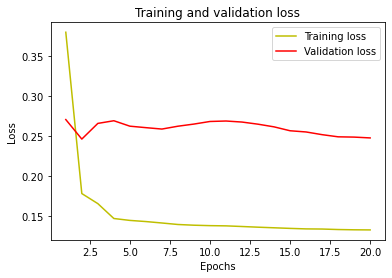

Configuration: timesteps=5, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.3584560453891754
mae: 0.3018912374973297
rmse: 0.4208011329174042
Epoch 1/20
28/28 [==============================] - 0s 12ms/step - loss: 0.2373 - mae: 0.2035 - rmse: 0.2366 - val_loss: 0.2902 - val_mae: 0.2597 - val_rmse: 0.2902
Epoch 2/20
28/28 [==============================] - 0s 6ms/step - loss: 0.1752 - mae: 0.1435 - rmse: 0.1751 - val_loss: 0.2909 - val_mae: 0.2642 - val_rmse: 0.2909
Epoch 3/20
28/28 [==============================] - 0s 3ms/step - loss: 0.1574 - mae: 0.1296 - rmse: 0.1575 - val_loss: 0.2534 - val_mae: 0.2249 - val_rmse: 0.2534
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1621 - mae: 0.1341 - rmse: 0.1622 - val_loss: 0.2851 - val_mae: 0.2630 - val_rmse: 0.2851
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 0.1500 - mae: 0.1236 - rmse: 0.1503 - val_loss: 0.2878 - val_mae: 0.2647 - val_rmse: 0.2878
Epoch 6/20
28

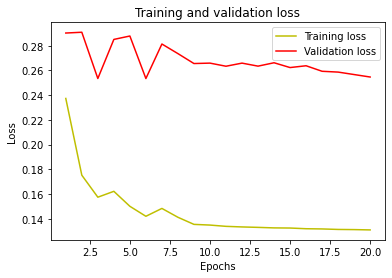

Configuration: timesteps=5, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.3640579283237457
mae: 0.30519554018974304
rmse: 0.4254026412963867
Epoch 1/10
39/39 [==============================] - 0s 6ms/step - loss: 0.3189 - mae: 0.2872 - rmse: 0.3182 - val_loss: 0.3570 - val_mae: 0.3156 - val_rmse: 0.3540
Epoch 2/10
39/39 [==============================] - 0s 3ms/step - loss: 0.2196 - mae: 0.1902 - rmse: 0.2192 - val_loss: 0.2535 - val_mae: 0.2227 - val_rmse: 0.2527
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1643 - mae: 0.1371 - rmse: 0.1647 - val_loss: 0.2715 - val_mae: 0.2523 - val_rmse: 0.2704
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.1501 - mae: 0.1254 - rmse: 0.1506 - val_loss: 0.2513 - val_mae: 0.2305 - val_rmse: 0.2519
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.1456 - mae: 0.1196 - rmse: 0.1465 - val_loss: 0.2986 - val_mae: 0.2761 - val_rmse: 0.3018
Epoch 6/10
39

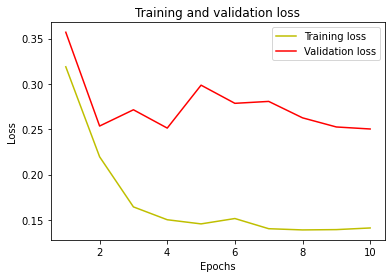

Configuration: timesteps=7, epochs=10, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.37576165795326233
mae: 0.3181915581226349
rmse: 0.45441731810569763
Epoch 1/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5857 - mae: 0.5563 - rmse: 0.5815 - val_loss: 0.2746 - val_mae: 0.2128 - val_rmse: 0.2746
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 0.1763 - mae: 0.1456 - rmse: 0.1769 - val_loss: 0.3035 - val_mae: 0.2751 - val_rmse: 0.3035
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1646 - mae: 0.1367 - rmse: 0.1652 - val_loss: 0.2842 - val_mae: 0.2563 - val_rmse: 0.2842
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1542 - mae: 0.1261 - rmse: 0.1548 - val_loss: 0.3037 - val_mae: 0.2765 - val_rmse: 0.3037
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.1515 - mae: 0.1266 - rmse: 0.1521 - val_loss: 0.2814 - val_mae: 0.2567 - val_rmse: 0.2814
Epoch 6/10
2

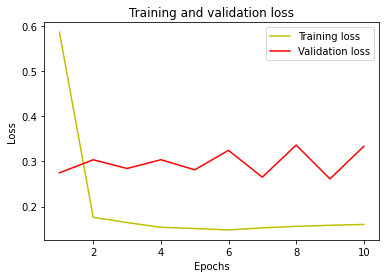

Configuration: timesteps=7, epochs=10, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.4937582015991211
mae: 0.40342676639556885
rmse: 0.5877718925476074
Epoch 1/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4169 - mae: 0.3810 - rmse: 0.4166 - val_loss: 0.4512 - val_mae: 0.3958 - val_rmse: 0.4536
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1915 - mae: 0.1582 - rmse: 0.1926 - val_loss: 0.3449 - val_mae: 0.3058 - val_rmse: 0.3550
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1678 - mae: 0.1373 - rmse: 0.1688 - val_loss: 0.3519 - val_mae: 0.3134 - val_rmse: 0.3678
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1576 - mae: 0.1305 - rmse: 0.1582 - val_loss: 0.3217 - val_mae: 0.2920 - val_rmse: 0.3373
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1486 - mae: 0.1224 - rmse: 0.1492 - val_loss: 0.3253 - val_mae: 0.2947 - val_rmse: 0.3410
Epoch 6/20
39

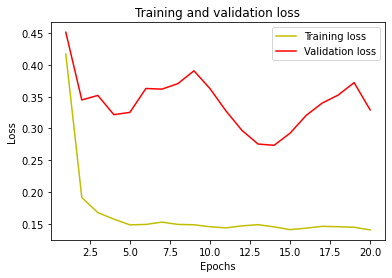

Configuration: timesteps=7, epochs=20, batch_size=5, filters=16, kernel_size=5, pool_size=2
loss: 0.47210484743118286
mae: 0.39017412066459656
rmse: 0.5717536807060242
Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.4310 - mae: 0.3965 - rmse: 0.4257 - val_loss: 0.3216 - val_mae: 0.2748 - val_rmse: 0.3216
Epoch 2/20
28/28 [==============================] - 0s 3ms/step - loss: 0.2489 - mae: 0.2118 - rmse: 0.2476 - val_loss: 0.2802 - val_mae: 0.2362 - val_rmse: 0.2802
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1996 - mae: 0.1690 - rmse: 0.1988 - val_loss: 0.3394 - val_mae: 0.2976 - val_rmse: 0.3394
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1650 - mae: 0.1383 - rmse: 0.1651 - val_loss: 0.2813 - val_mae: 0.2523 - val_rmse: 0.2813
Epoch 5/20
28/28 [==============================] - 0s 3ms/step - loss: 0.1820 - mae: 0.1513 - rmse: 0.1817 - val_loss: 0.2740 - val_mae: 0.2467 - val_rmse: 0.2740
Epoch 6/20
2

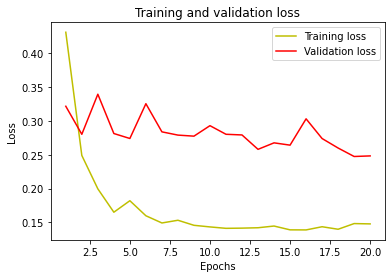

Configuration: timesteps=7, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.37937551736831665
mae: 0.31667715311050415
rmse: 0.4546395242214203


In [7]:
scores = grid_search(df_multi, configs, features)

## Forecasting

Import methods

In [8]:
from Data.data_processing import data_denormalization
from models import call_model, forecast_single_multi, forecast_multi, plot_forecast

Get trained model from a config

Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.4972 - mae: 0.4659 - rmse: 0.4911 - val_loss: 0.3127 - val_mae: 0.2681 - val_rmse: 0.3127
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1896 - mae: 0.1560 - rmse: 0.1893 - val_loss: 0.2893 - val_mae: 0.2563 - val_rmse: 0.2893
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1578 - mae: 0.1311 - rmse: 0.1581 - val_loss: 0.3200 - val_mae: 0.2830 - val_rmse: 0.3200
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1538 - mae: 0.1278 - rmse: 0.1541 - val_loss: 0.2799 - val_mae: 0.2487 - val_rmse: 0.2799
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1638 - mae: 0.1360 - rmse: 0.1640 - val_loss: 0.2717 - val_mae: 0.2428 - val_rmse: 0.2717
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.1521 - mae: 0.1268 - rmse: 0.1523 - val_loss: 0.2830 - val_mae: 0.2550 - val_rmse: 0.2830
Epoch 7/20
28/28

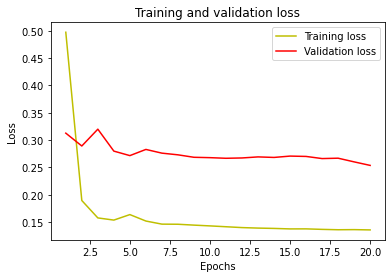

Configuration: timesteps=7, epochs=20, batch_size=7, filters=16, kernel_size=5, pool_size=2
loss: 0.35958707332611084
mae: 0.3019000291824341
rmse: 0.4303513467311859


In [9]:
my_config = (7, 20, 7, 16, 5, 2)
model = call_model(df_multi, my_config, features)[0]

Single-step forecast

In [10]:
forecast_single_multi(model, df_multi, my_config[0], features, scaler)

252.79713